In [1]:
# importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading csv file
df = pd.read_csv('bank.csv', sep=';',quotechar='"')

In [3]:
# EDA

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [6]:
print('Number of instances: ',  df.shape[0])
print('Number of attributes:', df.shape[1])
print('Nmber of unique values:\n', df.nunique())
print('Number of null vlaues:\n', df.isnull().sum())
print('Number of predicted values: \n', df.y.value_counts())

Number of instances:  4521
Number of attributes: 17
Nmber of unique values:
 age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64
Number of null vlaues:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Number of predicted values: 
 no     4000
yes     521
Name: y, dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df2 = df.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [12]:
# Fitting and performance evaluation

In [13]:
from sklearn.preprocessing import LabelEncoder
col= ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for i in col:
    df2[i] = LabelEncoder().fit_transform(df2[i])
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [14]:
from sklearn.model_selection import train_test_split
x = df2.drop('y',axis=1)
y = df2.y


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [16]:
def predictor(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.predict(x_test), model.score(x_test, y_test)
    

In [17]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
y_pred, y_score=predictor(reg, x_train, x_test, y_train, y_test)
print('Predicted Value: ',y_pred)
print('Score: ',y_score)

Predicted Value:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

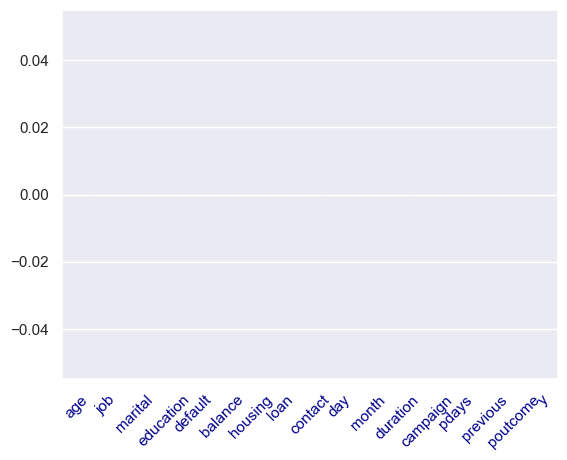

In [18]:
# data visualization
sns.set()
sns.barplot(x=df.columns, y=df.isnull().sum())
plt.xticks(rotation=45, color='darkblue')
plt.show()

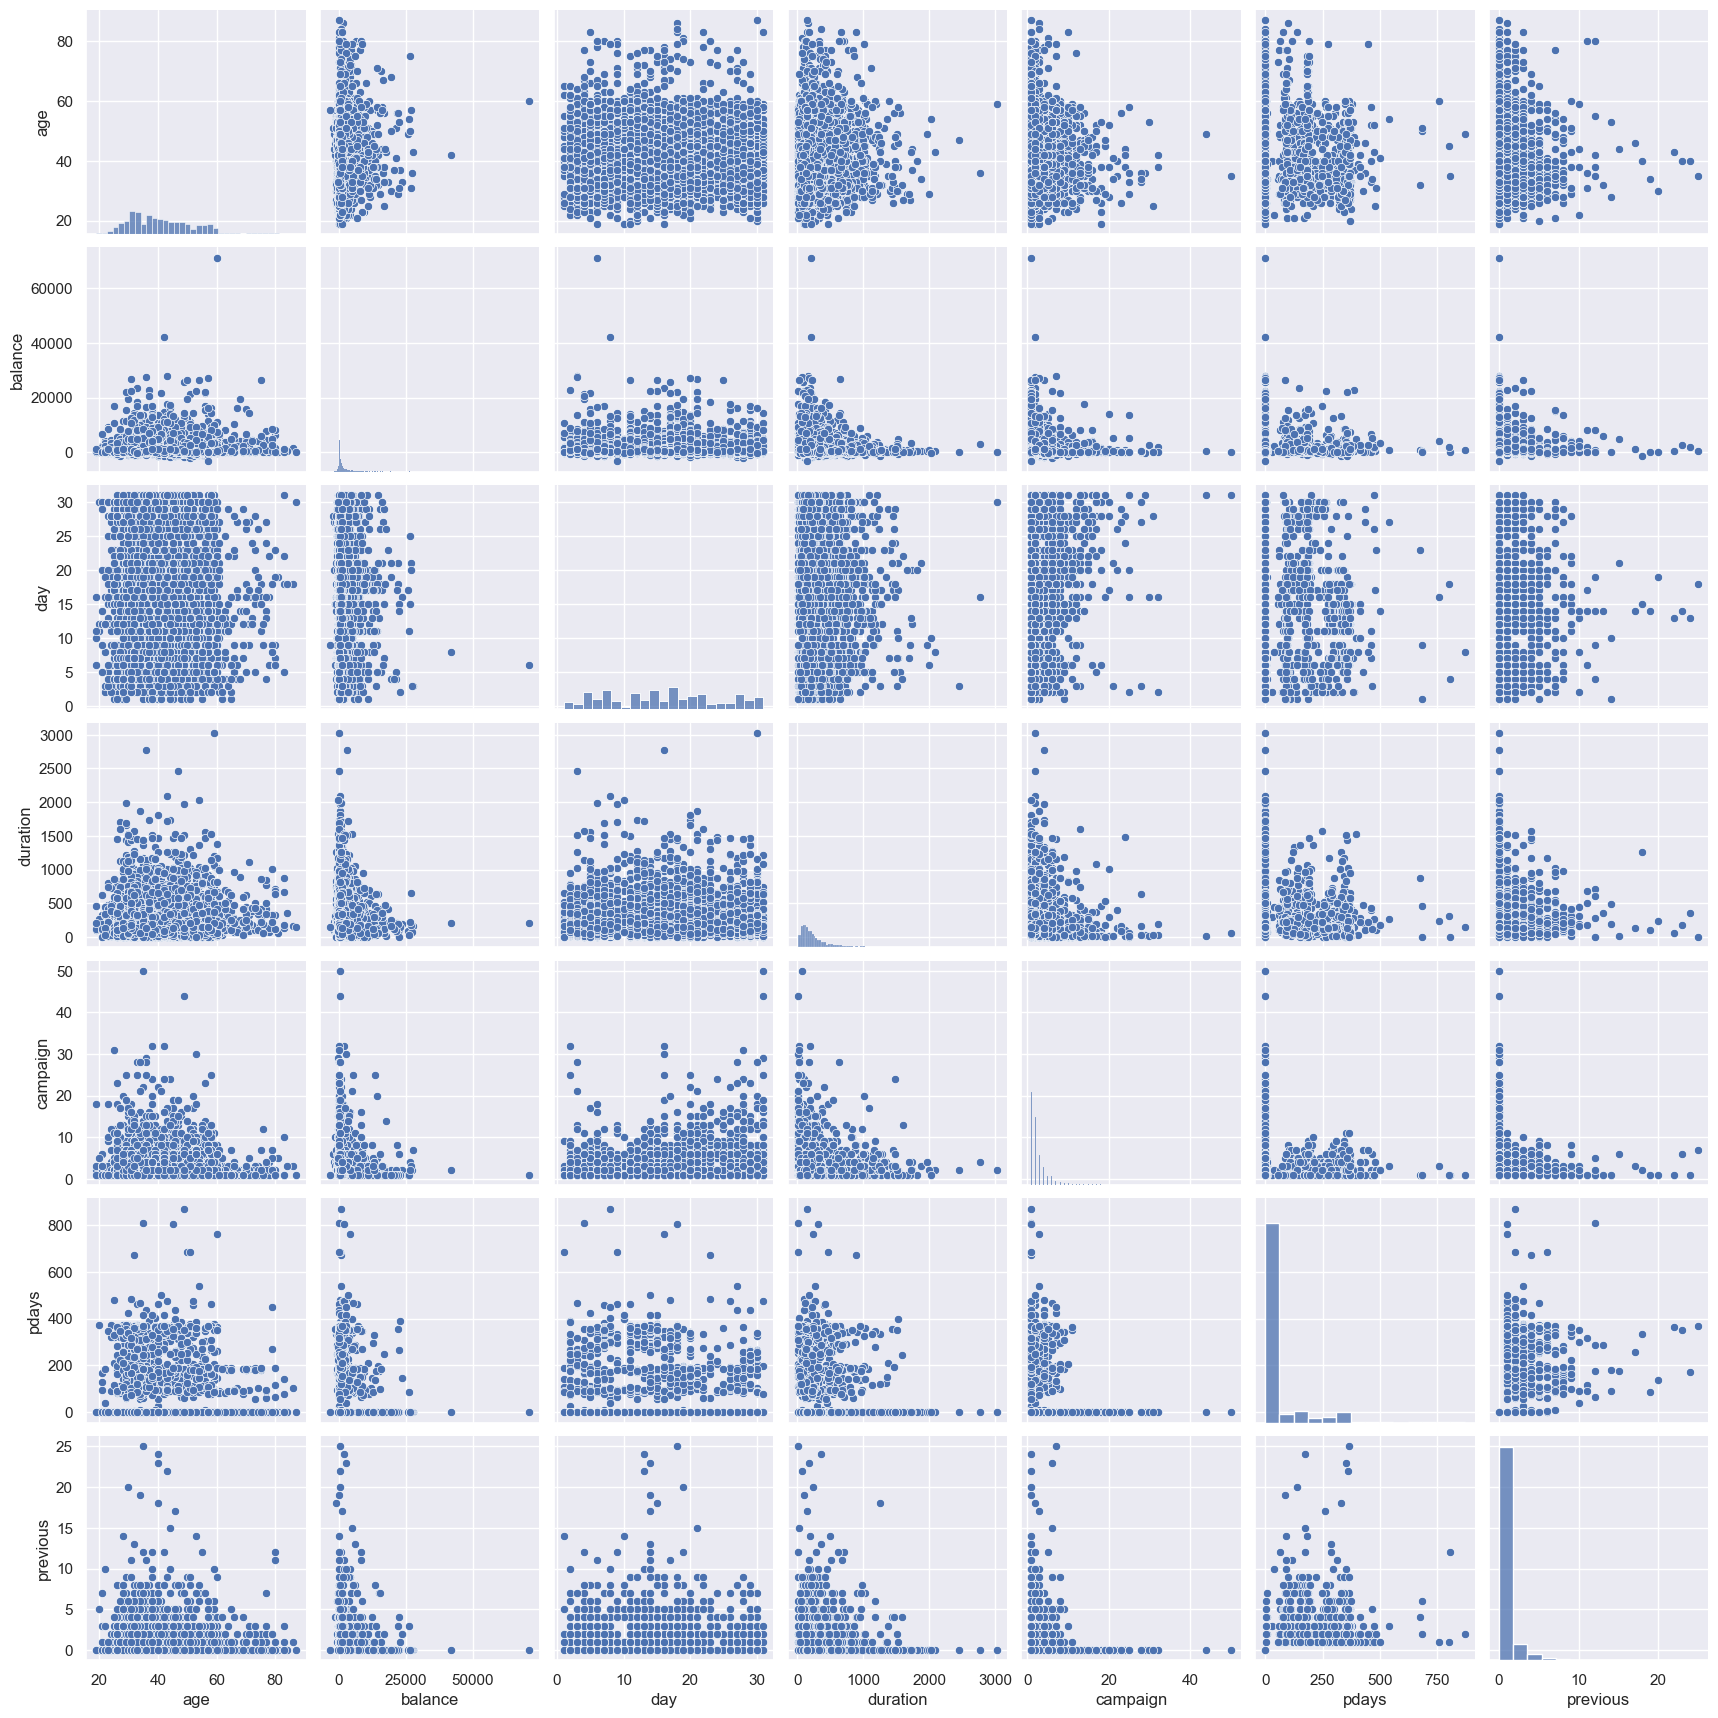

In [19]:
sns.pairplot(data=df)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(x_train, y_train)

In [21]:
featur = pd.Series(rf.feature_importances_, index=rf.feature_names_in_)

Text(0.5, 1.0, 'Feature Importance')

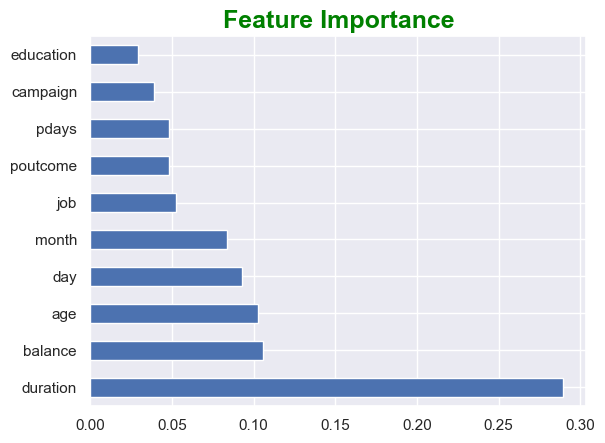

In [22]:
featur.nlargest(10).plot(kind='barh')
plt.title('Feature Importance', weight='bold', color='green', size=18)

<Axes: xlabel='duration', ylabel='count'>

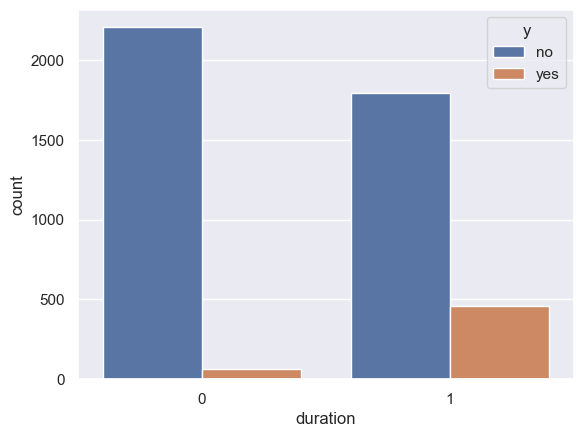

In [23]:
df3 = df.copy()
df3['duration'][df3.duration <= df3['duration'].median()]=0
df3['duration'][df3.duration > df3['duration'].median()]=1

sns.countplot(x='duration', data=df3, hue='y')

<Axes: xlabel='y', ylabel='count'>

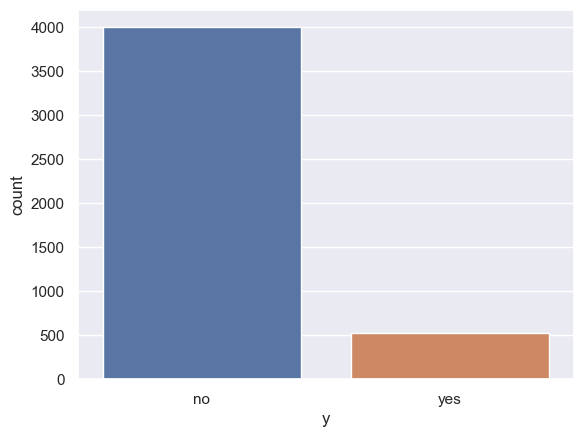

In [24]:
sns.countplot(x='y', data=df)

In [25]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Axes: xlabel='duration', ylabel='Count'>

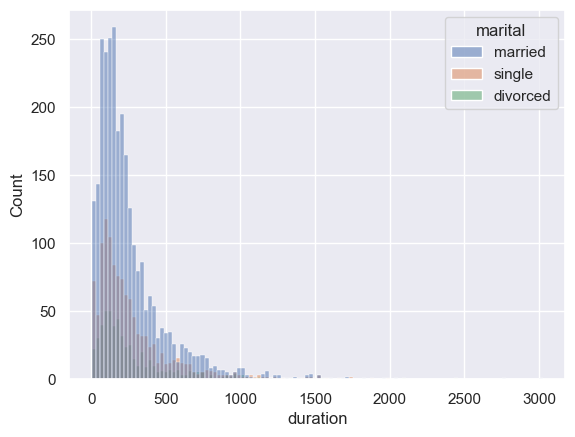

In [26]:
sns.histplot(x='duration', data=df, hue='marital')

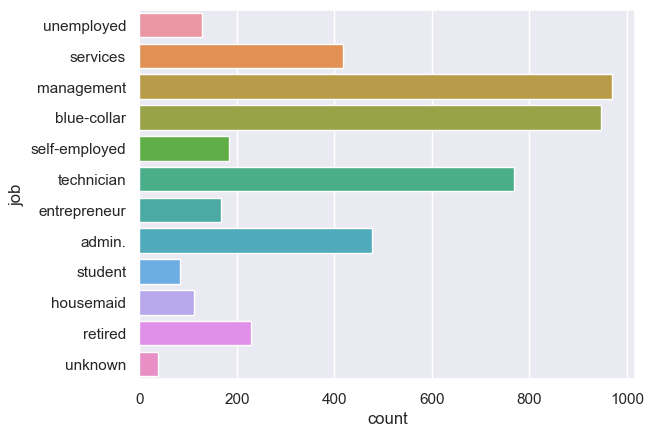

In [27]:
sns.countplot(y='job', data=df)

plt.show()

Text(0.5, 1.0, 'Feature Importance')

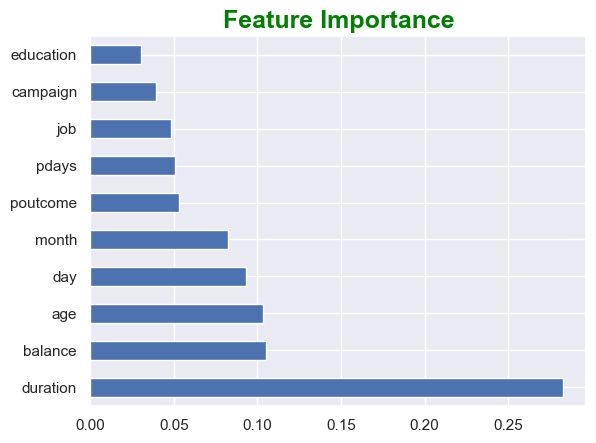

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(x_train, y_train)
featur = pd.Series(rf.feature_importances_, index=rf.feature_names_in_)
featur.nlargest(10).plot(kind='barh')
plt.title('Feature Importance', weight='bold', color='green', size=18)

In [29]:
x_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [30]:
x_train_new=x_train.drop(['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact','campaign', 'pdays',
       'previous', 'poutcome'], axis=1)
x_test_new=x_test.drop(['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact','campaign', 'pdays',
       'previous', 'poutcome'], axis=1)

In [31]:
def evaluation(pred_val, true_val):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    accuracy = accuracy_score(pred_val, true_val)
    precision = precision_score(pred_val, true_val,pos_label=1)
    recall = recall_score(pred_val, true_val,pos_label=1)
    F1 = f1_score(pred_val, true_val, pos_label=1)
    result=pd.DataFrame({
        'Accuracy':accuracy, 
        'Precision': precision,
        'Recall': recall,
        'F1': F1
        
        
    }, index=['Result'])
    return result.T

In [34]:
reg = LogisticRegression()
reg.fit(x_train_new, y_train)

evaluation(reg.predict(x_test_new), y_test)

,Result
Accuracy,0.896133
Precision,0.230769
Recall,0.631579
F1,0.338028
